## Basics of network analysis

https://github.com/socialcomquant/summer-school-2022/blob/main/Day2_Tizzoni_Network_Analysis/2_network_analysis.ipynb

DataSet : https://snap.stanford.edu/data/ca-AstroPh.html

This is data of undirected graphs with the links representing co-authorship


Topics covered:
- Clustering Coefficient
- [ToDo] Shortest Paths and visualisations
- [ToDo] Centrality Measure

In [1]:
import networkx as nx

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
path = './Data/ca-AstroPh.txt'

In [5]:
df = pd.read_csv(path, sep = '\t')
df.head()

,# FromNodeId,ToNodeId
0,84424,276
1,84424,1662
2,84424,5089
3,84424,6058
4,84424,6229


In [6]:
G = nx.Graph()

In [7]:
for i in list(range(0, len(df),1)):
    G.add_edge(df['# FromNodeId'][i],df['ToNodeId'][i])

In [8]:
len(G.nodes())

18772

In [9]:
len(G.edges())

198110

#### Components in connected graphs

In [10]:
nx.is_connected(G)
#This should be false if there are components

False

In [11]:
nx.number_connected_components(G)

290

In [12]:
Node_Len = []
for k in nx.connected_components(G):
    Node_Len = np.append(Node_Len, len(k))
#This would give length of subgraph, which would essentially be the number of nodes.

In [13]:
len(Node_Len)

290

In [14]:
max(Node_Len)

17903.0

In [15]:
Components = list(nx.connected_components(G))

In [16]:
pos = 0
for j in range(1,len(Components),1):
    
    if(len(Components[j]) == max(Node_Len)):
        pos = j

#There would be a better sorting algo

In [17]:
len(Components[pos])

17903

In [18]:
G_C_Max = G.subgraph(Components[pos])

In [19]:
len(G_C_Max.nodes())
nx.is_connected(G_C_Max)
#This subgraphs is connected. #Could also be the largest co-author community.
len(G) - len(G_C_Max)

869

### Clustering coefficients

Local and global clustering coefficients. 

In [20]:
#Number of triangles in the graph
tt = sum(list(nx.triangles(G_C_Max).values()))/3

In [21]:
#Total number of possible triangles, Here the triplets could also be open and hence not needed to be all 3
tpt = math.factorial(len(G_C_Max.nodes()))/(math.factorial(3) * math.factorial(len(G_C_Max.nodes()) - 3))

In [22]:
#Transitivity
4050042/956210276151.0

nx.transitivity(G_C_Max)

0.31777791273391154

In [23]:
#Would like to print the distribution of the local clustering coefficients. This would give the centralised?
ClusteringCoefL = nx.clustering(G_C_Max)

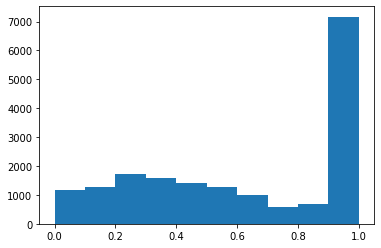

In [24]:
#The key would be the node id
plt.hist(ClusteringCoefL.values())
plt.show()
#This would mean, it is quiete a connected graphs, a majority of neighbours are connected with the neighbours.

In [25]:
nx.average_clustering(G_C_Max)

0.6328232091518589

### Shortest Distance

In this lets explore the visualisation and also the shortest distance, using the airport data set.

In [26]:
Airport_Codes = pd.read_csv('./Data/US_Airport_Code.txt', header=None, sep=' ')

In [27]:
Airport_Codes.head()

,0,1,2
0,29,78,95
1,29,114,37483
2,29,117,47
3,29,134,16
4,29,169,40


In [28]:
Airport_Codes.columns = ['From', 'To', 'Passenger_Count']

In [29]:
Airport_Codes.head()

,From,To,Passenger_Count
0,29,78,95
1,29,114,37483
2,29,117,47
3,29,134,16
4,29,169,40


In [30]:
#Here the graph is undirected (this according to the documentation) is mainly due to equal weighting for to and fro passengers (symmetric)// This seems directed

A = nx.DiGraph()

for k in range(0,Airport_Codes.shape[0],1):
    A.add_edge(int(Airport_Codes['From'][k]),int(Airport_Codes['To'][k]))

In [31]:
len(A)

405

In [32]:
Airport_Loc = pd.read_csv('./Data/US_Airport_Loc.txt', sep = ' ')

In [33]:
Airport_Loc.head()

,id,code,city,lat,lon
0,29,ABE,Allentown,40.654722,-75.438333
1,30,ABI,Abilene,32.409444,-99.679722
2,32,ABQ,Albuquerque,35.041667,-106.606389
3,33,ABR,Aberdeen,45.449722,-98.421667
4,35,ABY,Albany,31.532222,-84.196111


In [34]:
# This is for defining the dictionary for additional attributes to the graph
A.code = {}
A.pos = {}

In [35]:
for j in range(0,Airport_Loc.shape[0],1):
    node = Airport_Loc['id'][j]
    A.code[node] = Airport_Loc['code'][j]
    A.pos[node] = (float(Airport_Loc['lon'][j]), float(Airport_Loc['lat'][j]))

(-127.04962499999999, -65.237875, 23.3436116, 50.0063884)

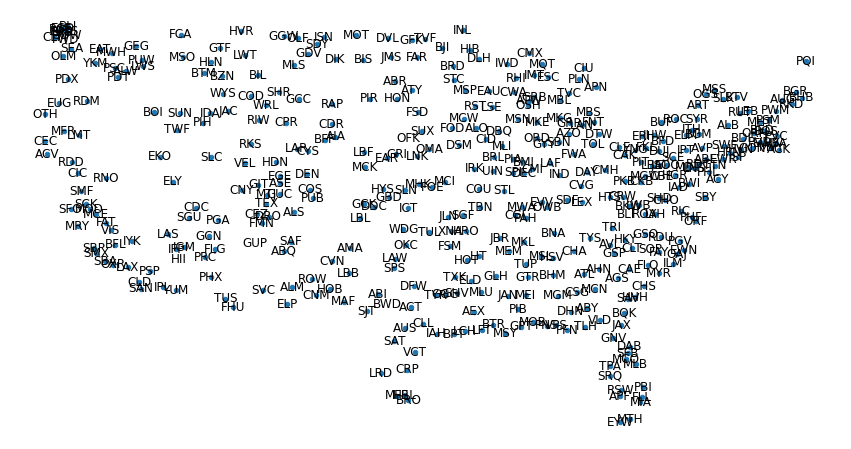

In [36]:
fig = plt.figure(figsize=(15,8))

nx.draw_networkx_nodes(A, pos = A.pos, node_size=20)
nx.draw_networkx_labels(A,pos=A.pos,labels=A.code)

plt.axis('off')

In [37]:
nx.number_strongly_connected_components(A)

5

In [38]:
A_U = nx.Graph()
for k in range(0,Airport_Codes.shape[0],1):
    A_U.add_edge(int(Airport_Codes['From'][k]),int(Airport_Codes['To'][k]))

In [39]:
len(A_U.nodes())

405

In [40]:
len(A.nodes())

405

### Exploring Connectedness

In [41]:
#Just considering connections and not the number of passengers (Weight)
nx.average_clustering(A)

0.6097876398260947

In [42]:
#Degree distribution // Could use less objects
deg = np.array(nx.degree(A))
InD = np.array(A.in_degree(nx.nodes(A)))
OutD = np.array(A.out_degree(nx.nodes(A)))

deg_c = []
InD_c = []
OutD_c = []

for i in range(0,len(deg),1):
    deg_c = np.append(deg_c,deg[i][1])
    InD_c = np.append(InD_c,InD[i][1])
    OutD_c = np.append(OutD_c,OutD[i][1])

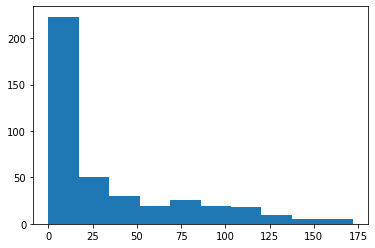

In [43]:
plt.hist(InD_c)
plt.show()

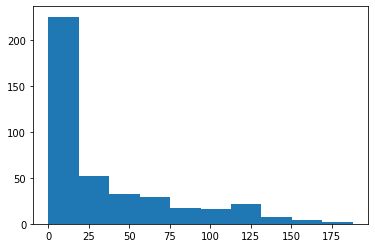

In [44]:
plt.hist(OutD_c)
plt.show()

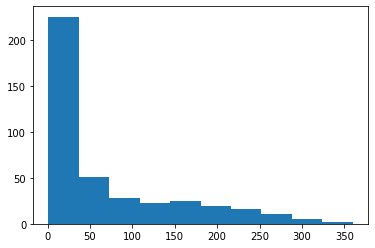

In [45]:
plt.hist(deg_c)
plt.show()

In [103]:
#There could be if else case statement, also the print could be better
for i in range(0,len(deg_c),1):
    if (deg[i][1] == max(deg_c)):
        d = deg[i][0]

    if (InD[i][1] == max(InD_c)):
        j = InD[i][0]

    if (OutD[i][1] == max(OutD_c)):
        o = OutD[i][0]


print('Airport with max connections-',max(deg_c),'\n',Airport_Loc[Airport_Loc['id'] == d],'\n')
print('Airport with max in-connections-',max(InD_c),'\n',Airport_Loc[Airport_Loc['id'] == j],'\n')
print('Airport with max out-connections-', max(OutD_c),'\n', Airport_Loc[Airport_Loc['id'] == o],'\n')

Airport with max connections- 360.0 
       id code    city        lat         lon
104  389  DEN  Denver  39.765278 -104.879444 

Airport with max in-connections- 172.0 
       id code    city        lat         lon
104  389  DEN  Denver  39.765278 -104.879444 

Airport with max out-connections- 188.0 
       id code    city        lat         lon
104  389  DEN  Denver  39.765278 -104.879444 



In [52]:
#To Do >> Log Log plot

In [73]:
#Lets calculate centrality measurese, this is a directed graph
Components_airports = list(nx.strongly_connected_components(A))

In [96]:
#Degrees here are not very clear in this directed graph

SubGraph_Len = []

#for k in Components_airports:
    
   # print(len(A.subgraph(k).in()))
    
    #print(len(nx.subgraph(k).nodes()))
  #  SubGraph_Len = np.append(SubGraph_Len, len(k))
#This would give length of subgraph, which would essentially be the number of nodes.
    

# Rough

In [48]:
Node_Len.sort()

(array([141., 120.,  17.,   3.,   4.,   2.,   1.,   0.,   0.,   1.]),
 array([ 1. ,  2.7,  4.4,  6.1,  7.8,  9.5, 11.2, 12.9, 14.6, 16.3, 18. ]),
 <BarContainer object of 10 artists>)

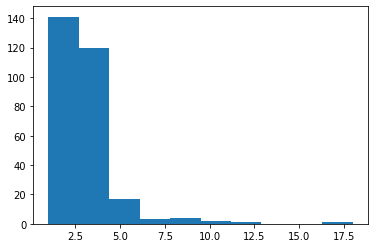

In [49]:
plt.hist(Node_Len[0:289])

In [50]:
t = nx.nodes(A)

In [51]:
np.array(t)

array([  29,   78,  114,  117,  134,  169,  206,  296,  300,  311,  317,
        381,  391,  403,  432,  435,  489,  526,  534,  609,  610,  619,
        691,  709,  716,  727,  731,  760,  880,  899,  918,  978,  982,
        994, 1022, 1029, 1066, 1101, 1200, 1252, 1264, 1313, 1359, 1374,
       1391, 1435, 1504, 1517, 1628, 1700,   30,  478,  590,  719, 1461,
       1470,   32,   75,   76,   82,  123,  145,  158,  176,  211,  215,
        216,  239,  246,  321,  327,  334,  343,  356,  358,  389,  494,
        500,  507,  585,  595,  622,  677,  685,  686,  711,  718,  749,
        757,  874,  875,  877,  879,  964,  998, 1011, 1047, 1061, 1068,
       1072, 1176, 1185, 1201, 1231, 1240, 1255, 1297, 1304, 1320, 1353,
       1372, 1403, 1405, 1408, 1413, 1426, 1433, 1437, 1480, 1529, 1596,
       1613, 1630,   33,  118,   35,  598,   38,  498,  700,  702, 1090,
         39,  335,  536,  872, 1008, 1629, 1645,   40,  196,  271, 1350,
         41,   60,  256,  258,  344,  361,  375,  5